<a href="https://colab.research.google.com/github/yunjeong-chang/2021_MachineVision/blob/main/week6_LS_based_line_fitting%26RANSAC_line_fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LS-based line fitting

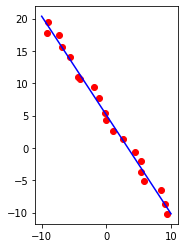

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f(x,a,b):
  return a*x+b

a, b = -1.5, 5
x = np.linspace(-10, 10, 20)
y = f(x,a,b)
xn = x + 0.5*np.random.normal(size=len(x))
yn = y + 0.5*np.random.normal(size=len(y))

An = np.vstack([xn, np.ones(len(xn))]).T
abn = np.dot(np.linalg.inv(np.dot(An.T, An)), np.dot(An.T, yn))
#abn = np.polyfit(xn, yn, 1)

plt.plot(xn, yn, 'or')
plt.plot(x, f(x,abn[0],abn[1]), '-b')
plt.gca().set_aspect('equal')
plt.show()

# RANSAC line fitting

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def f(x,a,b):
  return a*x+b

def ransac_line_fiting(x,y,r,t):
  iter = np.round(np.log(1-0.999) / np.log(1-(1-r)**2) + 1)
  num_max = 0
  for i in np.arange(iter):
    id = np.random.permutation(len(x))
    xs = x[id[:2]]
    ys = y[id[:2]]
    A = np.vstack([xs, np.ones(len(xs))]).T
    ab = np.dot(np.linalg.inv(np.dot(A.T, A)), np.dot(A.T, ys))
    dist = np.abs(ab[0]*x-y+ab[1])/np.sqrt(ab[0]**2+1)
    numInliers = sum(dist < t)
    if numInliers > num_max:
      ab_max = ab
      num_max = numInliers
  return ab_max, num_max

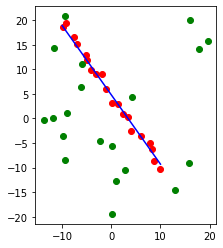

In [4]:
a, b = -1.5, 5
x = np.linspace(-10, 10, 20)
y = f(x,a,b)
xn = x + 0.5*np.random.normal(size=len(x))
yn = y + 0.5*np.random.normal(size=len(y))
xo = 10*np.random.normal(size=len(x))
yo = 10*np.random.normal(size=len(x))

xno = np.concatenate((xn,xo))
yno = np.concatenate((yn,yo))

abno, max = ransac_line_fiting(xno,yno,0.5,2)

plt.plot(xn, yn, 'or')
plt.plot(xo, yo, 'og')
plt.plot(x, f(x,abno[0],abno[1]), '-b')
plt.gca().set_aspect('equal')
plt.show()